<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [ ]:
#CODE BELOW AFTER THE NOTES

Project Tasks:

Task 1: Familiarize yourself with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [ ]:
## Ok I think I'm familiarized

Task 2: Generate basic statistics and visualizations for upper management.

Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot
Provide a  bar plot for the Charles river variable
Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
Create a histogram for the pupil to teacher ratio variable


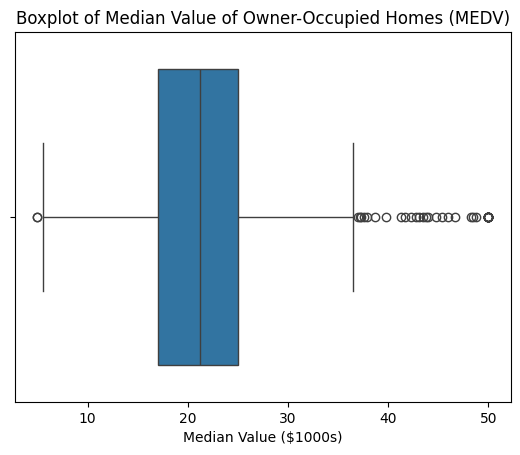

In [3]:
# Boxplot for the "Median value of owner-occupied homes"
sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
pyplot.xlabel('Median Value ($1000s)')
pyplot.show()

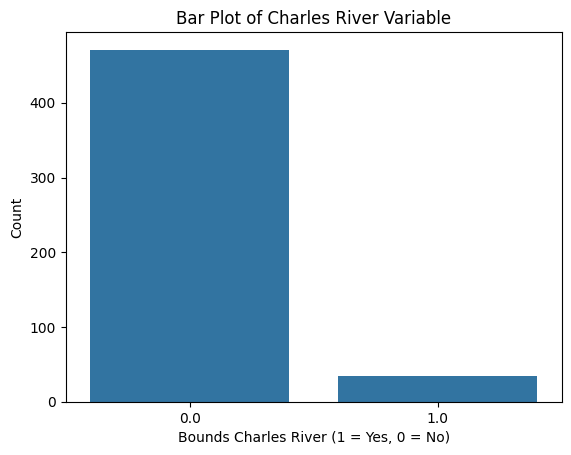

In [4]:
# Bar plot for the Charles River variable
sns.countplot(x='CHAS', data=boston_df)
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Bounds Charles River (1 = Yes, 0 = No)')
pyplot.ylabel('Count')
pyplot.show()

In [5]:
# Create age groups for AGE variable
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '70+'])


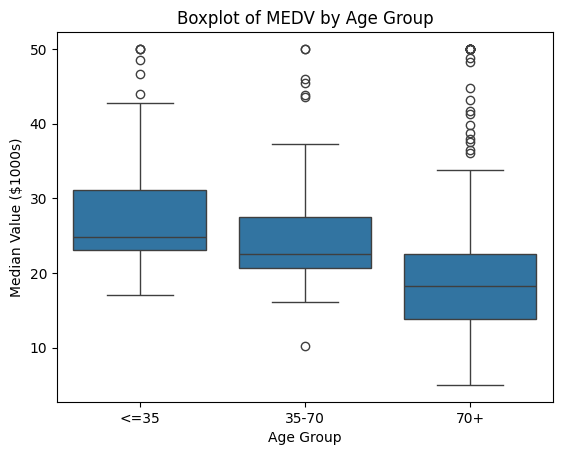

In [6]:
# Boxplot for MEDV vs AGE group
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV by Age Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value ($1000s)')
pyplot.show()

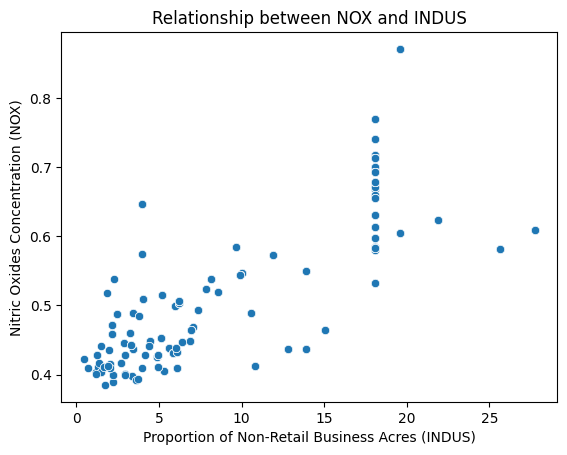

In [7]:
# Scatter plot: NOX vs INDUS
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Relationship between NOX and INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')
pyplot.show()

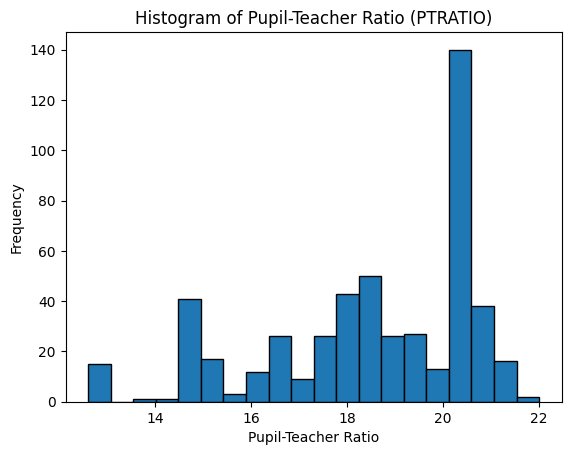

In [8]:
# Histogram of PTRATIO
pyplot.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
pyplot.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
pyplot.xlabel('Pupil-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()


Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
Be sure to:

State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

In [10]:
# easier naming import
import scipy.stats as stats

In [11]:
# 1. T-test: MEDV by CHAS (Charles River)
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_val = stats.ttest_ind(group1, group0)

print("T-test: MEDV by CHAS")
print(f"t-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in MEDV based on proximity to the Charles River.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in MEDV based on proximity to the Charles River.")

# 2. ANOVA: MEDV by AGE group

T-test: MEDV by CHAS
t-statistic = 3.9964, p-value = 0.0001
Conclusion: Reject the null hypothesis. There is a significant difference in MEDV based on proximity to the Charles River.


Question 2

In [13]:
# 2. ANOVA: MEDV by AGE group
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA: MEDV by AGE group")
print(anova_table)
if anova_table['PR(>F)'][0] < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in MEDV between age groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in MEDV between age groups.")



ANOVA: MEDV by AGE group
                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Conclusion: Reject the null hypothesis. There is a significant difference in MEDV between age groups.


/tmp/ipython-input-2599438588.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


Question 3:

In [14]:
# 3. Pearson Correlation: NOX and INDUS
corr_coef, corr_p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("\nPearson Correlation: NOX vs INDUS")
print(f"Correlation coefficient = {corr_coef:.4f}, p-value = {corr_p:.4f}")
if corr_p < 0.05:
    print("Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant relationship between NOX and INDUS.")



Pearson Correlation: NOX vs INDUS
Correlation coefficient = 0.7637, p-value = 0.0000
Conclusion: Reject the null hypothesis. There is a significant relationship between NOX and INDUS.


Question 4

In [15]:
# 4. Regression: MEDV vs DIS
X = sm.add_constant(boston_df['DIS'])  # Add intercept
model = sm.OLS(boston_df['MEDV'], X).fit()
print("\nLinear Regression: MEDV vs DIS")
print(model.summary())
if model.pvalues['DIS'] < 0.05:
    print("Conclusion: Reject the null hypothesis. Weighted distance to employment centers significantly impacts MEDV.")
else:
    print("Conclusion: Fail to reject the null hypothesis. DIS does not significantly impact MEDV.")


Linear Regression: MEDV vs DIS
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        18:16:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.390